# Busqueda sección aurea

### Función de prueba

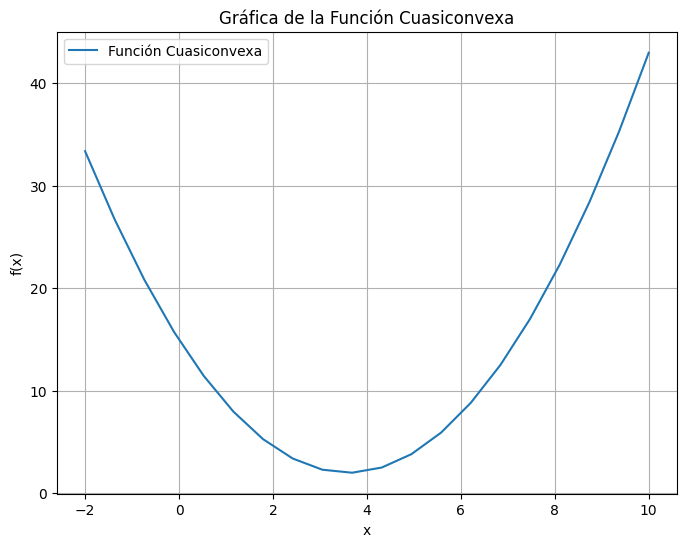

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def quasiconvex_function(x):
  return ((x-3.6)**2) +2

#Graficar función
# Generar valores de x
x_values = np.linspace(-2, 10, 20)

# Calcular los valores correspondientes de y utilizando la función quasiconvex_function
y_values = [quasiconvex_function(x) for x in x_values]

# Graficar la función
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='Función Cuasiconvexa')
plt.title('Gráfica de la Función Cuasiconvexa')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True)
plt.legend()

### Desarrollo de algoritmo

In [ ]:
def busqueda_seccion_aurea(func, a_inicial, b_inicial, incertidumbre=0.5):
    """
    Parámetros:
    func: función a minimizar
    a_inicial: límite inferior del intervalo inicial
    b_inicial: límite superior del intervalo inicial
    incertidumbre: tolerancia para el intervalo final
    
    Retorna:
    resultado: punto donde se encuentra el mínimo aproximado
    a: límite inferior del intervalo final
    b: límite superior del intervalo final
    """
    # Copiar valores iniciales
    a = a_inicial
    b = b_inicial
    l = incertidumbre
    
    # Definición de la razón áurea
    aurea = 0.618033988749895
    
    # Definición de puntos de prueba
    lambda_1 = a + (1 - aurea) * (b - a)
    mu_1 = a + aurea * (b - a)
    
    while (b - a) > l:
        if func(lambda_1) > func(mu_1):
            a = lambda_1
            lambda_1 = mu_1
            mu_1 = a + aurea * (b - a)
        else:
            b = mu_1
            mu_1 = lambda_1
            lambda_1 = a + (1 - aurea) * (b - a)
    
    # Resultado
    resultado = (a + b) / 2
    
    print("Resultado de la búsqueda por sección áurea:")
    print(f"El intervalo de incertidumbre se reduce a [{a:.4f}, {b:.4f}]")
    print(f"El mínimo se encuentra aproximadamente en x = {resultado:.4f}")
    
    return resultado, a, b

# Ejecutar la función con los parámetros originales
resultado, a, b = busqueda_seccion_aurea(quasiconvex_function, -2, 10, 0.5)


Resultado de la búsqueda por sección áurea:
El intervalo de incertidumbre se reduce a [3.5078, 3.9211]
El mínimo se encuentra aproximadamente en x = 3.7144


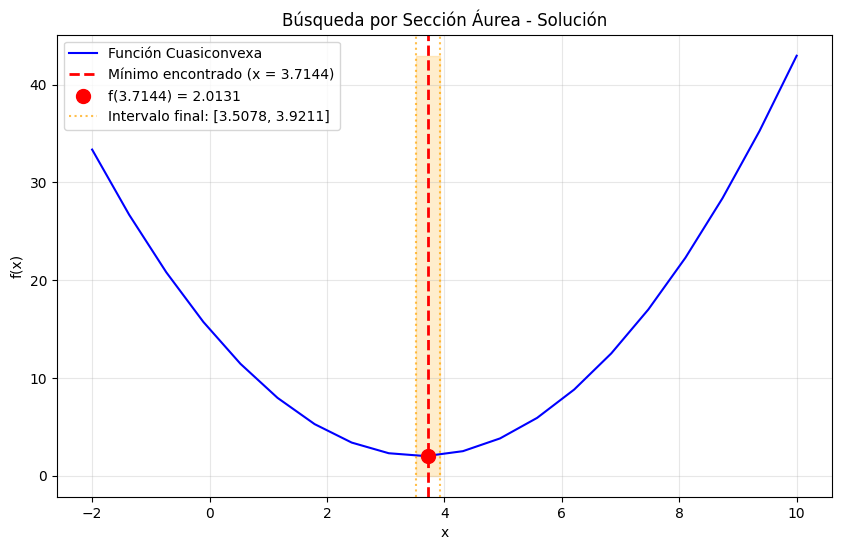

In [3]:
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='Función Cuasiconvexa', color='blue')
plt.axvline(x=resultado, color='red', linestyle='--', linewidth=2, label=f'Mínimo encontrado (x = {resultado:.4f})')
plt.scatter([resultado], [quasiconvex_function(resultado)], color='red', s=100, zorder=5, label=f'f({resultado:.4f}) = {quasiconvex_function(resultado):.4f}')
plt.axvline(x=a, color='orange', linestyle=':', alpha=0.7, label=f'Intervalo final: [{a:.4f}, {b:.4f}]')
plt.axvline(x=b, color='orange', linestyle=':', alpha=0.7)
plt.fill_betweenx([0, max(y_values)], a, b, alpha=0.2, color='orange')
plt.title('Búsqueda por Sección Áurea - Solución')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()